# Proyecto U3: Compound eye mapping of the ﬂy Musca domestica

### By: Jessica Arelys Rojas Palomino, Oscar David Hincapie Garcia

Este notebook posee los siguientes temas principales:
    - 1. Planteamiento:
        - 1.1 Contexto del problema.
        - 1.2 Metodología
        - 1.3 Análisis 
        - 1.4 Trabajos futuros
    - 2. Modelo:
        - 2.1 Descarga de las imágenes y organización de la base de datos
        - 2.2 Evaluación del modelo A (modelo simple)
        - 2.3 Evaluación del modelo B (modelo complejo)

## 1.1 Contexto del problema

Un ojo compuesto es un órgano visual que se encuentra en ciertos artrópodos como insectos y crustáceos. Estos ojos están compuestos por un gran número de unidades estructurales denominadas omatidias. Actualmente, en el departamento de Ciencia e Ingeniería de la Universidad de Groningen en Holanda, se está desarrollando un proyecto para determinar un método que permita realizar la evaluación cuantitativa de la distribución de los ejes omatidios de los ojos compuestos de artrópodos para medir con exactitud las coordenadas angulares (Ángulo azimutal y de elevación) de cada ommatidia a partir de un conjunto de imágenes tomadas desde diferentes coordenadas.

A continuación se muestran las imágenes del procedimiento aplicado a un ROI del ojo compuesto, este procesamiento se puede dividir en dos pasos:
1 Correlación cruzada: Para alinear 3 imágenes.
2 Interpolación con coordenadas barycentricas: para obtener las coordenadas angulares de las omatidias dentro un triángulo formado por el centro de las 3 imágenes.

![alt text](./imagen.JPG)

Cabe resaltar que las anotaciones que tiene cada imagen (coordenadas angulares azimuth, elevación y el número de la imagen) se conocen desde la adquisición. Sin embargo, por cantidad de las imágenes que se van a adquirir, el procesamiento debe ser automático. Es por ello que se plantea una estrategia de solución implementando técnicas de Deep Learning para el procesamiento de las imágenes.

Para el proyecto U3 (redes convolucionales) se propone implementar una estrategia de clasificación que permita identificar los tipos de ángulos azimutales de cada imagen obtenida, debido a que este ángulo es conocido desde el inicio de la adquisición de las imágenes. El dataset con el que se trabajará cuenta con 108 imágenes que fue adiquirido a través de un sistema óptico diseño por el Departamento de Superficie y Películas Delgadas de la universidad mencionada.

## 1.2 Metodología

#### Dataset
Se cuenta con 108 imágenes divididas en 7 ángulos azimutales diferentes: 0, 300, 310, 320, 330, 340 y 350.
#### Métrica de evaluación 
Se hará uso de las redes neurales convolucionales (CNN) para clasificar cada imagen según la clase a la que corresponda, en este caso la clase estará determinada por el ángulo azimutal.
#### Estrategia de resolución
Se realizará un pre-procesado de las imágenes y se evaluarán diferentes arquitecturas de red para evaluar la precisión del modelo para la clasificación.
#### Flujo de trabajo
- Para la versión final, inicialmente se importan las librerías que serán necesarias para la correcta ejecución del proyecto.
- Posteriormente, se realiza un código sencillo para organizar el dataset según las clases que se trabajarán, en esta versión final, se trabajó únicamente con tres clases correspondientes a los ángulos azimutales: 0, 310 y 350.
- Debido a que para poder empezar el entrenamiento debemos tener las imagenes preprocesadas, se diseña el generador que contiene la información para saber cómo se va a realizar el preprocesado, se reescalan las imagenes y cada pixel estarán entre 0 y 1 para hacer más eficiente el entrenamiento en vez de ir de 0-255, se modifica el tamaño de las imagenes y  se define el numero de imagenes que le vamos a enviar a nuestra computadora a procesar en cada uno de los pasos (batch_size).
- Posteriormente, ya que la clasificación que haremos será categórica, se selecciona class_mode='binary' y finalmente, se imprimimen las imagenes correspondientes a las clases que vamos a trabajar.
- Separamos nuestras imagenes con respecto a los datos de entrenamiento y a los de validación e imprimimos la distribución en las clases de entrenamiento y en las clases para realizar la validación. 
- Posteriormente creamos nuestra red neuronal convolucional CNN, tomando los conceptos aprendidos de la teoría de clase: https://github.com/rramosp/20191.DL/blob/master/U3.01%20-%20Convolutional%20Neural%20Networks.ipynb definimos la primera capa de entrada que recibe toda la información de pixeles de nuestra imagen, pasaremos nuestra información a las capas ocultas, estaremos utilizando Maxpooling: para agrupar y reducir la dimension de la estructura quedandonos sólamente con los pixeles de mayor valor lo que hará que sea menos pesado realizar el procesamiento de todas las imagenes ya que nos quedaremos con una matriz más pequeña, también tendremos capas que se encargarán de realizar las convoluciones, las cuales permitirán pasarle filtros a nuestra imagen para detectar ciertos patrones de interés, durante la primera convolución nuestra imagen tendrá una profundidad de 32 y posteriormente de 64. Los filtros que vamos a estar usando en las convoluciones tendrán altura y longitud de (3,3) y (2,2) respectivamente.
- Utilizamos capas Flatten para empezar nuestra clasificación, esa imagen que ahora es muy profunda pero pequeña, la haremos plana, le pasaremos esa información a capas normales "densas" y posteriormente utilizaremos Dropout: le apagaremos un % aleatoriamente de la neuronas cada paso, para evitar sobreajustar. Así nuestro modelo aprenderá caminos diferentes. Nuestras capas convolucionales y densas tendrán funciones de acitvación 'relu' y sólo la capa de salida le aplicaremos softmax, precisamente porque estamos trabajando con un problema de clasificación.
- Entrenamos el modelo e imprimos diferentes gráficos para determinar la precisión de nuestro modelo.

## 2.1 Descarguemos las imágenes
- Descargamos las imágenes desde google Drive.
- Procesamos las imágenes obtenidas para crear sub-folders con las clases:
    - Las clases hacen referencia al angulo azimutal, estos son 0,300,310,320,330,340,350.
    - Como se tienen 7 clases y esto genera complejidad en el modelo, se utilizarán 3 clases para el proyecto. Estas serán 0,310,350

In [1]:
!wget https://www.dropbox.com/s/qe502c4trqn4tcc/DataSet.zip?dl=0
!unzip DataSet.zip?dl=0
!unzip DataSet.zip

--2019-04-21 23:40:06--  https://www.dropbox.com/s/qe502c4trqn4tcc/DataSet.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.1, 2620:100:601d:1::a27d:501
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/qe502c4trqn4tcc/DataSet.zip [following]
--2019-04-21 23:40:07--  https://www.dropbox.com/s/raw/qe502c4trqn4tcc/DataSet.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc6d35cb7367d44c06d3e009b97d.dl.dropboxusercontent.com/cd/0/inline/Afeq9GT7o4UbDAkDaCxpRA5lE8CSKhnwpR647U9acb4EbKkshm5RFde_Rg5kanUF265q1btDqqk5IxIvwHg6AOiaDMl0-5utDCVbfosUAxLT0eF7zTBCxYmBLABfJS-5E6Q/file# [following]
--2019-04-21 23:40:07--  https://uc6d35cb7367d44c06d3e009b97d.dl.dropboxusercontent.com/cd/0/inline/Afeq9GT7o4UbDAkDaCxpRA5lE8CSKhnwpR647U9acb4EbKkshm5RFde_Rg5kanUF265q1btDqqk5IxIvwHg6AOiaDMl0-5utDCVbfosUAxLT0eF7

  inflating: Dataset/Frame075_Elevation10_Azimuth320.tif  
  inflating: __MACOSX/Dataset/._Frame075_Elevation10_Azimuth320.tif  
  inflating: Dataset/Frame089_Elevation30_Azimuth310.tif  
  inflating: __MACOSX/Dataset/._Frame089_Elevation30_Azimuth310.tif  
  inflating: Dataset/Frame071_Elevation50_Azimuth320.tif  
  inflating: __MACOSX/Dataset/._Frame071_Elevation50_Azimuth320.tif  
  inflating: Dataset/Frame019_Elevation50_Azimuth350.tif  
  inflating: __MACOSX/Dataset/._Frame019_Elevation50_Azimuth350.tif  
  inflating: Dataset/Frame009_Elevation30_Azimuth0.tif  
  inflating: __MACOSX/Dataset/._Frame009_Elevation30_Azimuth0.tif  
  inflating: Dataset/Frame067_Elevation80_Azimuth330.tif  
  inflating: __MACOSX/Dataset/._Frame067_Elevation80_Azimuth330.tif  
  inflating: Dataset/Frame076_Elevation0_Azimuth320.tif  
  inflating: __MACOSX/Dataset/._Frame076_Elevation0_Azimuth320.tif  
  inflating: Dataset/Frame047_Elevation50_Azimuth340.tif  
  inflating: __MACOSX/Dataset/._Frame047_Ele

In [3]:
import sys
import os
from time import time
import pandas as pd
import numpy as np
import mlutils
import matplotlib.pyplot as plt
%matplotlib inline

import itertools
from sklearn.metrics import confusion_matrix
from __future__ import division

In [4]:
import tensorflow as tf
from tensorflow.python.keras.preprocessing.image  import ImageDataGenerator, array_to_img, img_to_array, load_img
from tensorflow.python.keras import backend as K

In [5]:
Path='./Dataset'
Files=os.listdir(Path)
Files

['Frame089_Elevation30_Azimuth310.tif',
 'Frame081_Elevation60_Azimuth320.tif',
 'Frame037_Elevation50_Azimuth340.tif',
 'Frame048_Elevation60_Azimuth340.tif',
 'Frame088_Elevation40_Azimuth310.tif',
 'Frame091_Elevation10_Azimuth310.tif',
 'Frame012_Elevation50_Azimuth0.tif',
 'Frame002_Elevation40_Azimuth0.tif',
 'Frame077_Elevation-10_Azimuth320.tif',
 'Frame047_Elevation50_Azimuth340.tif',
 'Frame020_Elevation40_Azimuth350.tif',
 'Frame041_Elevation10_Azimuth340.tif',
 'Frame073_Elevation30_Azimuth320.tif',
 'Frame084_Elevation90_Azimuth320.tif',
 'Frame016_Elevation90_Azimuth0.tif',
 'Frame042_Elevation0_Azimuth340.tif',
 'Frame104_Elevation40_Azimuth300.tif',
 'Frame030_Elevation50_Azimuth350.tif',
 'Frame087_Elevation50_Azimuth310.tif',
 'Frame008_Elevation20_Azimuth0.tif',
 'Frame099_Elevation80_Azimuth310.tif',
 'Frame051_Elevation90_Azimuth340.tif',
 'Frame003_Elevation30_Azimuth0.tif',
 'Frame045_Elevation-30_Azimuth340.tif',
 'Frame096_Elevation50_Azimuth310.tif',
 'Frame07

In [7]:
des_organized_data=1
if des_organized_data==1:
    for fil in Files: 
        if fil.endswith('.tif'):
            Nam = fil.split('.')[0].split('_')
            Nam_class = Nam[len(Nam)-1].replace(' ','')  
            if Nam_class=='Azimuth0' or Nam_class=='Azimuth310' or Nam_class=='Azimuth350':
                if not os.path.exists(Path+'/'+Nam_class):
                      os.mkdir(Path+'/'+Nam_class)
                os.rename(Path+'/'+fil,Path+'/'+Nam_class+'/'+fil)

### Definamos el siguiente código para buscar repetibilidad a la hora de ejecutar el código

In [8]:
os.environ['PYTHONHASHSEED']='0'
np.random.seed(111)
sesion_conf=tf.ConfigProto(intra_op_parallelism_threads=1,inter_op_parallelism_threads=1)
tf.set_random_seed(111)
sess=tf.Session(graph=tf.get_default_graph(),config=sesion_conf)
K.set_session(sess)
#aug.seed(111)

In [9]:
K.clear_session()

Cargamos las imágenes con ImageDataGenerator para realizar el preprocesamiento de las imágenes.

In [10]:
datagen = ImageDataGenerator(rescale=1./255., fill_mode='nearest')
img_size = 100
train_generator_fn = lambda: datagen.flow_from_directory(
        Path,  # this is the target directory
        target_size=(img_size, img_size),  # all images will be resized to 150x150
        batch_size=100,
        interpolation = "bilinear",
        class_mode='binary') 

Found 43 images belonging to 3 classes.
(43,) (43, 100, 100, 3) [0. 0. 2. 2. 2. 2. 2. 1. 0. 0. 2. 0. 1. 2. 1. 1. 1. 2. 0. 1. 0. 2. 0. 0.
 2. 1. 2. 0. 2. 1. 1. 0. 0. 0. 2. 0. 1. 0. 1. 1. 2. 2. 1.]


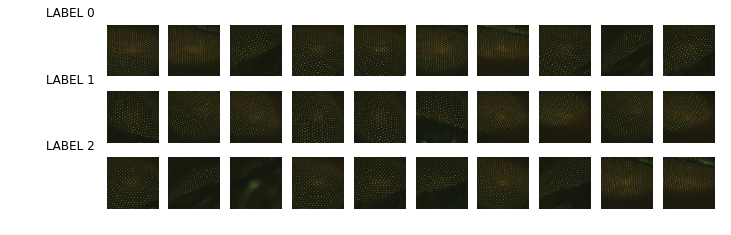

In [11]:
for imgs,labels in train_generator_fn():
    if np.random.random()>.5:
        break
print labels.shape,imgs.shape,labels
mlutils.show_labeled_image_mosaic(imgs, labels)

In [13]:
print imgs.shape,labels.shape

(43, 100, 100, 3) (43,)


Dividimos el dataset en datos de validación y entrenamiento. 75% de los datos para entrenar y 25% de los datos para validar

In [22]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(imgs, labels, test_size=.25)
num_classes = len(np.unique(y_train))
print x_train.shape, y_train.shape, x_test.shape, y_test.shape
print "\ndistribution of train classes"
print pd.Series(y_train).value_counts()
print "\ndistribution of test classes"
print pd.Series(y_test).value_counts()
print "\nnum classes", num_classes

(32, 100, 100, 3) (32,) (11, 100, 100, 3) (11,)

distribution of train classes
2.0    12
1.0    11
0.0     9
dtype: int64

distribution of test classes
0.0    6
2.0    3
1.0    2
dtype: int64

num classes 3


In [15]:
# Definimos el modelo A (modelo simple)
def get_conv_model_A(num_classes, img_size=100):
    
    tf.reset_default_graph()
    tf.keras.backend.clear_session()
    
    inputs = tf.keras.Input(shape=(img_size,img_size,3),name='Input')
    
    layers = tf.keras.layers.Convolution2D(32, (3,3), padding ="same", activation='relu')(inputs)
    layers = tf.keras.layers.MaxPooling2D(pool_size=(2,2))(layers)

    layers = tf.keras.layers.BatchNormalization()(layers)
    
    layers = tf.keras.layers.Convolution2D(64, (2,2), padding ="same", activation='relu')(layers)
    layers = tf.keras.layers.MaxPooling2D(pool_size=(2,2))(layers)

    #layers = tf.keras.layers.BatchNormalization()(layers)
    
    layers = tf.keras.layers.Flatten()(layers)
    
    layers = tf.keras.layers.Dense(256, activation='relu')(layers)
    layers = tf.keras.layers.Dense(16, activation='relu')(layers)
    layers = tf.keras.layers.Dropout(0.5)(layers)
    
    predictions = tf.keras.layers.Dense(num_classes, activation='softmax',name='Output')(layers)

    model = tf.keras.Model(inputs = inputs, outputs=predictions)
    
    model.compile(optimizer = tf.keras.optimizers.Adam(lr=0.0001),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [16]:
# Definimos el modelo B (modelo complejo)
def get_conv_model_B(num_classes, img_size=100):
    
    tf.reset_default_graph()
    tf.keras.backend.clear_session()
    
    inputs = tf.keras.Input(shape=(img_size,img_size,3),name='Input')
    
    layers = tf.keras.layers.Convolution2D(32, (3,3), padding ="same", activation='relu')(inputs)
    layers = tf.keras.layers.MaxPooling2D(pool_size=(2,2))(layers)
    layers = tf.keras.layers.BatchNormalization()(layers)
    layers = tf.keras.layers.Dropout(0.3)(layers)
    
    layers = tf.keras.layers.Convolution2D(64, (2,2), padding ="same", activation='relu')(layers)
    layers = tf.keras.layers.MaxPooling2D(pool_size=(2,2))(layers)
    layers = tf.keras.layers.BatchNormalization()(layers)
    layers = tf.keras.layers.Dropout(0.3)(layers)
    
    layers = tf.keras.layers.Flatten()(layers)
    
    layers = tf.keras.layers.Dense(256, activation='relu')(layers)
    layers = tf.keras.layers.Dense(36, activation='relu')(layers)
    layers = tf.keras.layers.Dense(16, activation='relu')(layers)
    layers = tf.keras.layers.Dropout(0.3)(layers)
    
    predictions = tf.keras.layers.Dense(num_classes, activation='softmax',name='Output')(layers)

    model = tf.keras.Model(inputs = inputs, outputs=predictions)
    
    model.compile(optimizer = tf.keras.optimizers.Adam(lr=0.0001),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [17]:
def train(model, x_train, y_train, x_test, y_test, batch_size, epochs, model_name=""):
    model.reset_states()
    model.fit(x_train, y_train, epochs=epochs,
              batch_size=batch_size,
              validation_data=(x_test, y_test))
    metrics = model.evaluate(x_test, y_test)
    return {k:v for k,v in zip (model.metrics_names, metrics)}

In [18]:
def get_confusion_matrix(y_test,y_pred,num_classes,class_names,batch,epoc,save):
    if not os.path.exists('/home/user/20191.DL-master/Proyecto U3 v2/ConfusionMatrix'):
              os.mkdir('/home/user/20191.DL-master/Proyecto U3 v2/ConfusionMatrix') 
    cm=confusion_matrix(y_test,y_pred)
    cm = cm/np.sum(cm)
    cmap=plt.cm.Blues
    tick_marks = np.arange(num_classes)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title('Normalized confusion matrix')
    plt.colorbar()
    plt.xticks(tick_marks, class_names, rotation=0)
    plt.yticks(tick_marks, class_names)
    if save==1:
        plt.savefig('/home/user/20191.DL-master/Proyecto U3 v2/ConfusionMatrix/'+'Model_B'+str(batch)+'_E'+str(epoc)+'.png',
                   bbox_inches='tight',format='png',dpi=600)

In [19]:
def Plot_acuracys(model):
    plt.plot(model.history.history["acc"], label="acc")
    plt.plot(model.history.history["val_acc"], label="val_acc")
    plt.grid()
    plt.legend();
    plt.xlabel("training step")
    plt.ylabel("accuracy")
#    plt.ylim(0.4,1.05)

## 2.2 Creemos un modelo simple (Modelo A)

In [27]:
model = get_conv_model_A(num_classes)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input (InputLayer)           (None, 100, 100, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 100, 100, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 50, 50, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 50, 50, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 50, 50, 64)        8256      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 25, 25, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 40000)             0         
__________

In [28]:
train(model, x_train, y_train, x_test, y_test, batch_size=100, epochs=200, model_name="model_A")

Train on 32 samples, validate on 11 samples
Epoch 1/200
32/32 [==============================] - 3s 86ms/step - loss: 1.0987 - acc: 0.3125 - val_loss: 1.1533 - val_acc: 0.1818
Epoch 2/200
32/32 [==============================] - 1s 16ms/step - loss: 1.9997 - acc: 0.3750 - val_loss: 1.1053 - val_acc: 0.1818
Epoch 3/200
32/32 [==============================] - 0s 15ms/step - loss: 1.1214 - acc: 0.4688 - val_loss: 1.0877 - val_acc: 0.5455
Epoch 4/200
32/32 [==============================] - 0s 15ms/step - loss: 1.1665 - acc: 0.4062 - val_loss: 1.0950 - val_acc: 0.5455
Epoch 5/200
32/32 [==============================] - 1s 16ms/step - loss: 1.0210 - acc: 0.3750 - val_loss: 1.0975 - val_acc: 0.2727
Epoch 6/200
32/32 [==============================] - 1s 16ms/step - loss: 0.9815 - acc: 0.5625 - val_loss: 1.0989 - val_acc: 0.2727
Epoch 7/200
32/32 [==============================] - 1s 16ms/step - loss: 0.9420 - acc: 0.5000 - val_loss: 1.0996 - val_acc: 0.2727
Epoch 8/200
32/32 [=============

Epoch 63/200
32/32 [==============================] - 1s 16ms/step - loss: 0.5004 - acc: 0.7812 - val_loss: 1.0908 - val_acc: 0.2727
Epoch 64/200
32/32 [==============================] - 1s 16ms/step - loss: 0.6626 - acc: 0.6250 - val_loss: 1.0894 - val_acc: 0.2727
Epoch 65/200
32/32 [==============================] - 1s 17ms/step - loss: 0.3992 - acc: 0.8438 - val_loss: 1.0883 - val_acc: 0.2727
Epoch 66/200
32/32 [==============================] - 1s 20ms/step - loss: 0.4801 - acc: 0.7812 - val_loss: 1.0878 - val_acc: 0.2727
Epoch 67/200
32/32 [==============================] - 1s 17ms/step - loss: 0.4931 - acc: 0.7500 - val_loss: 1.0871 - val_acc: 0.2727
Epoch 68/200
32/32 [==============================] - 1s 20ms/step - loss: 0.4738 - acc: 0.8125 - val_loss: 1.0854 - val_acc: 0.2727
Epoch 69/200
32/32 [==============================] - 1s 17ms/step - loss: 0.3457 - acc: 0.8438 - val_loss: 1.0834 - val_acc: 0.2727
Epoch 70/200
32/32 [==============================] - 1s 21ms/step - 

Epoch 125/200
32/32 [==============================] - 1s 17ms/step - loss: 0.4525 - acc: 0.7500 - val_loss: 1.0790 - val_acc: 0.3636
Epoch 126/200
32/32 [==============================] - 1s 20ms/step - loss: 0.2722 - acc: 0.9062 - val_loss: 1.0826 - val_acc: 0.3636
Epoch 127/200
32/32 [==============================] - 1s 19ms/step - loss: 0.4786 - acc: 0.6562 - val_loss: 1.0852 - val_acc: 0.3636
Epoch 128/200
32/32 [==============================] - 1s 16ms/step - loss: 0.3520 - acc: 0.8750 - val_loss: 1.0876 - val_acc: 0.3636
Epoch 129/200
32/32 [==============================] - 1s 17ms/step - loss: 0.3876 - acc: 0.7812 - val_loss: 1.0881 - val_acc: 0.3636
Epoch 130/200
32/32 [==============================] - 1s 23ms/step - loss: 0.3752 - acc: 0.7812 - val_loss: 1.0871 - val_acc: 0.3636
Epoch 131/200
32/32 [==============================] - 1s 19ms/step - loss: 0.3672 - acc: 0.7500 - val_loss: 1.0858 - val_acc: 0.3636
Epoch 132/200
32/32 [==============================] - 1s 19ms

Epoch 187/200
32/32 [==============================] - 0s 15ms/step - loss: 0.2714 - acc: 0.8438 - val_loss: 1.0661 - val_acc: 0.3636
Epoch 188/200
32/32 [==============================] - 0s 15ms/step - loss: 0.2550 - acc: 0.9062 - val_loss: 1.0598 - val_acc: 0.3636
Epoch 189/200
32/32 [==============================] - 0s 15ms/step - loss: 0.4158 - acc: 0.7500 - val_loss: 1.0608 - val_acc: 0.4545
Epoch 190/200
32/32 [==============================] - 1s 16ms/step - loss: 0.3246 - acc: 0.7812 - val_loss: 1.0639 - val_acc: 0.4545
Epoch 191/200
32/32 [==============================] - 1s 16ms/step - loss: 0.3185 - acc: 0.8438 - val_loss: 1.0686 - val_acc: 0.4545
Epoch 192/200
32/32 [==============================] - 0s 16ms/step - loss: 0.4449 - acc: 0.7500 - val_loss: 1.0710 - val_acc: 0.4545
Epoch 193/200
32/32 [==============================] - 1s 18ms/step - loss: 0.3481 - acc: 0.8125 - val_loss: 1.0713 - val_acc: 0.3636
Epoch 194/200
32/32 [==============================] - 1s 22ms

{'acc': 0.4545454680919647, 'loss': 1.0528228282928467}

In [29]:
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred,axis=1)
class_names=['0','310','350']
Accuracy = np.mean(y_pred == y_test)
print('Accuracy = ', Accuracy*100, '%')

('Accuracy = ', 45.45454545454545, '%')


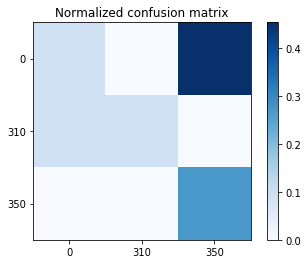

In [33]:
get_confusion_matrix(y_test,y_pred,num_classes,class_names,100,200,save=0)

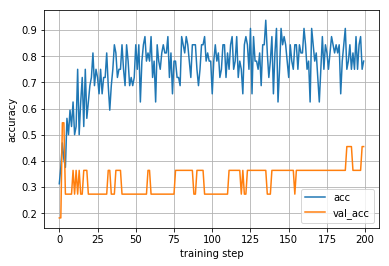

In [31]:
Plot_acuracys(model)

## 2.3 Evaluemos un modelo más complejo (Model B)

In [32]:
model_2 = get_conv_model_B(num_classes)
model_2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input (InputLayer)           (None, 100, 100, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 100, 100, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 50, 50, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 50, 50, 32)        128       
_________________________________________________________________
dropout (Dropout)            (None, 50, 50, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 50, 50, 64)        8256      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 25, 25, 64)        0         
__________

In [34]:
train(model_2, x_train, y_train, x_test, y_test, batch_size=100, epochs=200, model_name="model_B")

Train on 32 samples, validate on 11 samples
Epoch 1/200
32/32 [==============================] - 3s 97ms/step - loss: 1.9415 - acc: 0.4375 - val_loss: 1.1251 - val_acc: 0.1818
Epoch 2/200
32/32 [==============================] - 1s 18ms/step - loss: 1.4111 - acc: 0.3750 - val_loss: 1.1213 - val_acc: 0.1818
Epoch 3/200
32/32 [==============================] - 1s 19ms/step - loss: 1.2546 - acc: 0.4375 - val_loss: 1.1168 - val_acc: 0.1818
Epoch 4/200
32/32 [==============================] - 1s 21ms/step - loss: 0.9117 - acc: 0.5625 - val_loss: 1.1148 - val_acc: 0.1818
Epoch 5/200
32/32 [==============================] - 1s 19ms/step - loss: 0.9172 - acc: 0.6250 - val_loss: 1.1129 - val_acc: 0.1818
Epoch 6/200
32/32 [==============================] - 1s 19ms/step - loss: 0.9095 - acc: 0.6562 - val_loss: 1.1130 - val_acc: 0.1818
Epoch 7/200
32/32 [==============================] - 1s 18ms/step - loss: 0.7660 - acc: 0.7812 - val_loss: 1.1128 - val_acc: 0.1818
Epoch 8/200
32/32 [=============

Epoch 63/200
32/32 [==============================] - 1s 24ms/step - loss: 0.1153 - acc: 0.9062 - val_loss: 1.3088 - val_acc: 0.1818
Epoch 64/200
32/32 [==============================] - 1s 22ms/step - loss: 0.1768 - acc: 0.8750 - val_loss: 1.3170 - val_acc: 0.1818
Epoch 65/200
32/32 [==============================] - 1s 26ms/step - loss: 0.1550 - acc: 0.9062 - val_loss: 1.3270 - val_acc: 0.1818
Epoch 66/200
32/32 [==============================] - 1s 21ms/step - loss: 0.2490 - acc: 0.8125 - val_loss: 1.3373 - val_acc: 0.1818
Epoch 67/200
32/32 [==============================] - 1s 19ms/step - loss: 0.1308 - acc: 0.9062 - val_loss: 1.3421 - val_acc: 0.2727
Epoch 68/200
32/32 [==============================] - 1s 18ms/step - loss: 0.1269 - acc: 0.9062 - val_loss: 1.3475 - val_acc: 0.2727
Epoch 69/200
32/32 [==============================] - 1s 18ms/step - loss: 0.1495 - acc: 0.9062 - val_loss: 1.3568 - val_acc: 0.2727
Epoch 70/200
32/32 [==============================] - 1s 19ms/step - 

Epoch 125/200
32/32 [==============================] - 1s 18ms/step - loss: 0.0940 - acc: 0.9375 - val_loss: 1.9419 - val_acc: 0.1818
Epoch 126/200
32/32 [==============================] - 1s 18ms/step - loss: 0.1711 - acc: 0.9062 - val_loss: 1.9600 - val_acc: 0.1818
Epoch 127/200
32/32 [==============================] - 1s 18ms/step - loss: 0.0359 - acc: 1.0000 - val_loss: 1.9776 - val_acc: 0.1818
Epoch 128/200
32/32 [==============================] - 1s 19ms/step - loss: 0.1245 - acc: 0.8750 - val_loss: 1.9942 - val_acc: 0.1818
Epoch 129/200
32/32 [==============================] - 1s 18ms/step - loss: 0.1094 - acc: 0.9062 - val_loss: 2.0104 - val_acc: 0.1818
Epoch 130/200
32/32 [==============================] - 1s 21ms/step - loss: 0.1885 - acc: 0.8750 - val_loss: 2.0320 - val_acc: 0.1818
Epoch 131/200
32/32 [==============================] - 1s 20ms/step - loss: 0.0592 - acc: 0.9688 - val_loss: 2.0551 - val_acc: 0.1818
Epoch 132/200
32/32 [==============================] - 1s 25ms

Epoch 187/200
32/32 [==============================] - 1s 20ms/step - loss: 0.1409 - acc: 0.8750 - val_loss: 3.0579 - val_acc: 0.1818
Epoch 188/200
32/32 [==============================] - 1s 18ms/step - loss: 0.0404 - acc: 0.9688 - val_loss: 3.0911 - val_acc: 0.1818
Epoch 189/200
32/32 [==============================] - 1s 18ms/step - loss: 0.0882 - acc: 0.9375 - val_loss: 3.1206 - val_acc: 0.1818
Epoch 190/200
32/32 [==============================] - 1s 21ms/step - loss: 0.0266 - acc: 0.9688 - val_loss: 3.1459 - val_acc: 0.1818
Epoch 191/200
32/32 [==============================] - 1s 19ms/step - loss: 0.1272 - acc: 0.9375 - val_loss: 3.1751 - val_acc: 0.1818
Epoch 192/200
32/32 [==============================] - 1s 23ms/step - loss: 0.0500 - acc: 0.9688 - val_loss: 3.2036 - val_acc: 0.1818
Epoch 193/200
32/32 [==============================] - 1s 20ms/step - loss: 0.0924 - acc: 0.9062 - val_loss: 3.2176 - val_acc: 0.1818
Epoch 194/200
32/32 [==============================] - 1s 19ms

{'acc': 0.1818181872367859, 'loss': 3.3283066749572754}

In [36]:
y_pred = model_2.predict(x_test)
y_pred = np.argmax(y_pred,axis=1)
class_names=['0','310','350']
Accuracy = np.mean(y_pred == y_test)
print('Accuracy = ', Accuracy*100, '%')

('Accuracy = ', 18.181818181818183, '%')


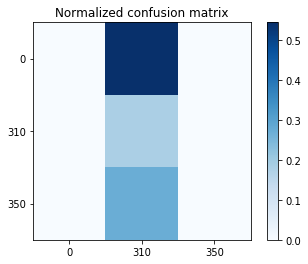

In [37]:
get_confusion_matrix(y_test,y_pred,num_classes,class_names,100,200,save=0)

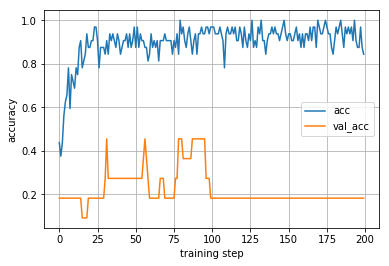

In [39]:
Plot_acuracys(model_2)

## 1.3 ANÁLISIS 

Durante el desarrollo de este proyecto se realizaron tres versiones diferentes de notebooks.

#### Análisis PROYECTO U3 Versión 1
Este fue el primer notebook probado, se utilizó una arquitectura empleada en clase, utilizando 3 épocas,  trabajando con tres clases, batch_size = 10 y un dropout de 0.2. El inconveniente de trabajar con esta arquitectura fue que en el momento de imprimir los gráficos de barras para visualizar las predicciones no se podía distinguir de manera precisa la relación de la imagen con la precisión. Cabe resaltar que estas imagenes que se procesaron en este proyecto NO son de fácil clasificación debido que no se puede determinar una clasificación a simple vista como lo haría un programa con un dataset de "perros" o "gatos". Estas imagenes contienen caracterísitcas diferenciables muy poco notorias, además el color de las imagenes puede hacer  que el sistema prediga erróneamente cuando se pasa los filtros durante la convolución.

#### Análisis PROYECTO U3 Versión 2
Debido al resultado anterior, se plantea otra estrategia implementando un nuevo diseño de arquitectura de red y una forma distinta de visualización, en este caso se emplea un dataset más pequeño de 2 clases con 3 imagenes por clase. Se realiza una arquitectura de CNN secuencial, con un Dropout de 0.5, batch_size=6, epocas=5, pero en esta ocasión al finalizar el entrenamiento lo que se hace es que se guarda nuestro modelo en un archivo para que no tengamos que entrenar nuestro modelo cada vez que queramos hacer una predicción. 


Luego de que entrenamos, llamamos a nuestra carperta generada llamada modelo y grabamos la arquitectura del modelo en un archivo y los pesos en otro archivo. Luego hacemos la predicción y en lugar de imprimir todas las imagenes, verificamos la predicción en la clasificación de cada imagen de manera individual debido a que la ingresamos por consola. A partir de ese momento visualizamos que el sistema no se equivoca, es decir, cuando le damos la dirección de la imagen (que contiene en el nombre el ángulo anotado de la clase a la que pertenece), el sistema procesa la imagen y efectivamente la clasifica en la clase a la que corresponde. Es por ello que visualizamos en este modelo la precisión y tenemos un acc: 1.0000, un val_loss: 4.5895e-06 y un val_acc: 1 por lo que determinamos que el modelo está sobre-entrenado.
     
#### Análisis PROYECTO U3 Versión 3
En este momento, luego de realizar las predicciones anteriores, implementamos el mismo flujo de trabajo mencionado en la metodología pero en este caso establecemos 3 clases: ['Azimuth310', 'Azimuth350', 'Azimuth0'] y dentro de la función para el modelo de la CNN definimos un lr=0.0001, hay 3 clases, dropout de 0.5. Se evaluaron diferentes valores para las epocas y para el batch_size construyendo dos gráficos que permiten determinar cómo afectan estos dos parámetros la precisión del modelo.
Desafortunadamente, los valores presentados en estos gráficos varían cada que se ejecuta el código.
Para esta versión del proyecto la cantidad de imágenes usadas fueron 43, mientras que en las dos primeras versiones se usaron 18 y 12 imágenes respectivamente.

#### Análisis de la versión final. PROYECTO U3 Versión Final
En esta versión se buscó darle más compleijdad al modelo, por lo que se definió un modelo B que tiene más capas y se le cambiaron algunos parámetros. El modelo complejo presenta diferencias grandes y poca presición a la hora de validar el modelo. Esto puede ser porque sea necesario cambiar algunos parámetros del modelo o porque la complejidad de las imágenes.

## 1.4 TRABAJO A FUTURO

- Debido a la complejidad de las imagenes, no se obtiene una predicción que indique que el sistema está realizando de manera óptima la clasificación de las imágenes, esto puede darse por muchos factores, inicialmente del dataset que contiene 108 imagenes se trabaja sólo con 90 de ellas, por lo cual, se puede considerar que son pocos datos para realizar el entrenamiento, es decir, el dataset es pequeño. Para una futura ejecución es aconsejable obtener más imagenes que pertenezcan a las clases analizadas.
- Por otro lado, las caracterísitcas de cada imagen, independiente de que tengan elevación o un ángulo azimutal completamente diferente, presentan el mismo patrón de colores con características similares. La variación de estos ángulos es indistingible al ojo humano, por lo cual en el momento de realizar el proceso de convolución pueden existir errores de precisión que alteren las predicciones. En este caso como no es posible cambiar las características del dataset debido al objetivo del proyecto, se puede aconsejar trabajar con un mayor número de épocas, aumentar el tamaño de las imágenes, es decir, modificar los parámetros del algorirtmo dependiendo de los valores obtenidos para un dataset de mayor tamaño.
- Adicionalmente, es importante mencionar que no sólo se espera clasificar los ángulos azimutales, sino también la elevación de estos con respecto a la clase perteneciente como se explicó en el contexto de este proyecto. Por lo anterior se espera no sólo trabajar con tres clases sino con un total de clases mayor y a su vez, realizar la clasificación del ángulo de elevación que tiene cada imagen. En conclusión trabajar con un número mayor de clases y sus respectivas elevaciones con el fin de obtener a cabalidad las coordenadas angulares que son de interés en el proyecto.
- Si no es posible obtener con precisión el resultado de clasificación de estas coordenadas, es aconsejable utilizar otra estrategia para realizar el procesamiento de las imágenes que no involucre el uso de redes convolucionales mediante Deep Learning debido a la naturaleza de las imágenes.